In [1]:
!pip install requests


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lavan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Install and Import Required Libraries
Install Instaloader using pip and import the necessary libraries including Instaloader and matplotlib.

In [2]:
# Install required libraries
!pip install instaloader requests matplotlib

# Import libraries
import instaloader
import requests
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lavan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install instaloader requests


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lavan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Initialize Instaloader
Initialize the Instaloader object to start extracting data.

In [4]:
# Initialize the Instaloader object to start extracting data
L = instaloader.Instaloader()

# Set up session using cookies

In [5]:
# Set up session using cookies
def setup_session_with_cookies(sessionid, csrftoken, ds_user_id):
    session = requests.Session()
    session.cookies.set("sessionid", sessionid)
    session.cookies.set("csrftoken", csrftoken)
    session.cookies.set("ds_user_id", ds_user_id)
    L.context._session = session
    print("Session established with cookies.")

# Extract Instagram Profile Data
Use Instaloader to download the profile data of a specified Instagram user.

In [6]:
def extract_profile_data(username):
    try:
        profile = instaloader.Profile.from_username(L.context, username)
        profile_data = {
            'username': profile.username,
            'fullname': profile.full_name,
            'followers': profile.followers,
            'following': profile.followees,
            'posts': profile.mediacount,
            'biography': profile.biography,
            'is_private': profile.is_private,
        }
        return profile, profile_data
    except Exception as e:
        print(f"Error fetching profile: {e}")
        return None, None

# Display Profile Details
Extract and display details such as username, number of posts, followers, and followees.

In [7]:
def display_profile_details(profile_data):
    print(f"\nProfile Details:")
    print(f"Username: {profile_data['username']}")
    print(f"Full Name: {profile_data['fullname']}")
    print(f"Followers: {profile_data['followers']}")
    print(f"Following: {profile_data['following']}")
    print(f"Posts: {profile_data['posts']}")
    print(f"Biography: {profile_data['biography']}")
    print(f"Private Account: {profile_data['is_private']}")

# Calculate Engagement Rate
Calculate the engagement rate based on the number of likes and comments on the posts.

In [8]:
def calculate_engagement_rate(profile, num_posts=10):
    total_likes = 0
    total_comments = 0
    count = 0
    for post in profile.get_posts():
        if count == num_posts:
            break
        total_likes += post.likes
        total_comments += post.comments
        count += 1
    engagement_rate = ((total_likes + total_comments) / (num_posts * profile.followers)) * 100
    return engagement_rate

# Visualize Engagement Rate
Use matplotlib to visualize the engagement rate over time.

In [9]:
def visualize_engagement_rate(engagement_rate, username):
    plt.figure(figsize=(6, 4))
    plt.bar([username], [engagement_rate], color='skyblue')
    plt.xlabel('Profile')
    plt.ylabel('Engagement Rate (%)')
    plt.title(f'Engagement Rate for {username}')
    plt.show()

## Analyze top posts by engagemnet 

In [10]:
def analyze_top_posts(profile, num_posts=10):
    post_data = []
    for post in profile.get_posts():
        post_data.append((post, post.likes + post.comments))
    # Sort posts by engagement and pick top posts
    top_posts = sorted(post_data, key=lambda x: x[1], reverse=True)[:num_posts]
    print("\nTop Posts by Engagement:")
    for i, (post, engagement) in enumerate(top_posts):
        print(f"Post {i + 1}: {engagement} engagements - {post.date_utc}")

## Main Function

Session established with cookies.

Profile Details:
Username: chaithrataratwinstories
Full Name: Mounika Vonteru
Followers: 179448
Following: 6
Posts: 441
Biography: Chaithra Tara Twin Stories
managed by 
Mom  @mounikareddyvonteru  
Dad @bharath_thipireddy
Private Account: False

Engagement Rate: 21.76%


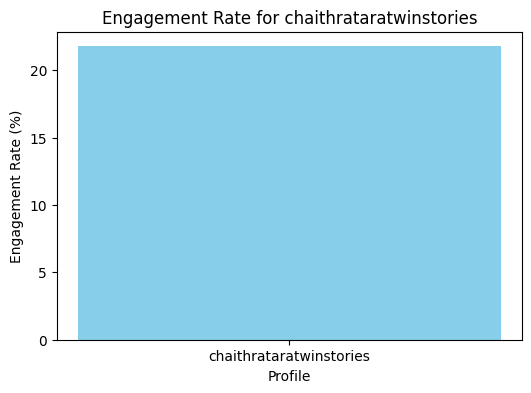


Too many queries in the last time. Need to wait 99 seconds, until 16:07.


KeyboardInterrupt: 

In [11]:
def main():
    # Enter your cookies once
    sessionid = input("Enter your Instagram sessionid cookie: ")
    csrftoken = input("Enter your Instagram csrftoken cookie: ")
    ds_user_id = input("Enter your Instagram ds_user_id cookie: ")

    # Set up session with cookies
    setup_session_with_cookies(sessionid, csrftoken, ds_user_id)

    # Get the target username to analyze
    target_username = input("Enter the Instagram username to analyze: ")

    # Extract profile data
    profile, profile_data = extract_profile_data(target_username)

    if profile and profile_data:
        # Display profile details
        display_profile_details(profile_data)

        # Calculate engagement rate
        engagement_rate = calculate_engagement_rate(profile)
        print(f"\nEngagement Rate: {engagement_rate:.2f}%")

        # Visualize engagement rate
        visualize_engagement_rate(engagement_rate, target_username)

        # Analyze top posts by engagement
        analyze_top_posts(profile)

# Run the main function
main()